In [1]:
import pandas as pd

df = pd.read_excel('../아파트(매매)_실거래가_20240529142946.xlsx', header=0)
# df.info()
df.head

<bound method NDFrame.head of           NO            시군구     번지   본번  부번              단지명  전용면적(㎡)    계약년월  \
0          1  서울특별시 성동구 옥수동    528  528   0  옥수파크힐스101동~116동    59.78  202405   
1          2  서울특별시 성동구 옥수동  220-1  220   1            한남하이츠   101.09  202404   
2          3  서울특별시 성동구 옥수동    436  436   0             극동그린   114.32  202404   
3          4  서울특별시 성동구 옥수동    528  528   0  옥수파크힐스101동~116동    59.78  202404   
4          5  서울특별시 성동구 옥수동    528  528   0  옥수파크힐스101동~116동    59.78  202404   
...      ...            ...    ...  ...  ..              ...      ...     ...   
15736  15737  서울특별시 강동구 강일동    670  670   0        강일리버파크5단지    84.74  202401   
15737  15738  서울특별시 강동구 강일동    707  707   0        고덕리엔파크1단지    84.83  202401   
15738  15739  서울특별시 강동구 강일동    114  114   0        강동리버스트4단지    59.99  202401   
15739  15740  서울특별시 강동구 강일동    707  707   0        고덕리엔파크1단지    84.83  202401   
15740  15741  서울특별시 강동구 강일동    670  670   0        강일리버파크5단지    84.83  202401  

In [2]:
# 괄호 없애고 결측값 확인.. 결측값 없음
df.columns = df.columns.str.replace('(','_') 
df.columns = df.columns.str.replace(')','_') 
df.isnull().sum()

NO          0
시군구         0
번지          0
본번          0
부번          0
단지명         0
전용면적_㎡_     0
계약년월        0
계약일         0
거래금액_만원_    0
동           0
층           0
매수자         0
매도자         0
건축년도        0
도로명         0
해제사유발생일     0
거래유형        0
중개사소재지      0
등기일자        0
주택유형        0
dtype: int64

In [ ]:
df['거래금액_만원_'] = df['거래금액_만원_'].str.replace(',','')  # 천단위 쉼표 제거
df.dtypes     # 거래금액_만원_ 의 데이터가 object타입임을 확인
# apply함수 안에 to_number함수를 씀으로써 object타입을 int형으로 바꿔준다
df['거래금액_만원_'] = df['거래금액_만원_'].apply(pd.to_numeric)

{'whiskers': [<matplotlib.lines.Line2D at 0x19629ecd510>,
 'caps': [<matplotlib.lines.Line2D at 0x1962db8f150>,
 'boxes': [<matplotlib.lines.Line2D at 0x19628c9ac10>],
 'medians': [<matplotlib.lines.Line2D at 0x196292ea7d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19629296ad0>],
 'means': []}

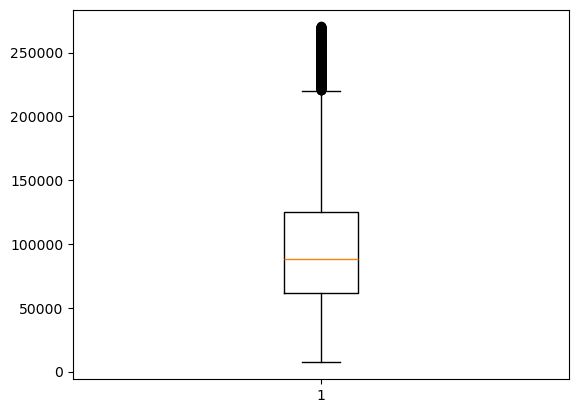

In [12]:
import matplotlib.pyplot as plt


# 이상치 확인
ax=plt.subplot()
ax.boxplot(df['거래금액_만원_'])

In [9]:
df.shape

(15741, 21)

In [11]:
df[(abs((df['거래금액_만원_']-df['거래금액_만원_'].mean())/df['거래금액_만원_'].std()))>1.96]
# 원데이터 15741개의 데이터 중 이상치는 627개로 확인됨

# 이상치를 제거하는 코드
df = df[(abs((df['거래금액_만원_']-df['거래금액_만원_'].mean())/df['거래금액_만원_'].std()))<=1.96]

,NO,시군구,번지,본번,부번,단지명,전용면적_㎡_,계약년월,계약일,거래금액_만원_,...,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,주택유형
1,2,서울특별시 성동구 옥수동,220-1,220,1,한남하이츠,101.0900,202404,29,204000,...,14,개인,개인,1982,독서당로 156,-,중개거래,"서울 서초구, 서울 성동구",-,아파트
22,23,서울특별시 성동구 옥수동,561,561,0,래미안 옥수 리버젠,113.5200,202404,11,230000,...,13,개인,개인,2012,매봉길 15,-,중개거래,서울 성동구,-,아파트
28,29,서울특별시 성동구 옥수동,528,528,0,옥수파크힐스101동~116동,115.1000,202404,10,220000,...,2,개인,개인,2016,매봉길 50,-,중개거래,서울 성동구,-,아파트
29,30,서울특별시 성동구 옥수동,100,100,0,옥수하이츠,114.7800,202404,8,258000,...,15,개인,개인,1998,한림말길 50,-,중개거래,서울 성동구,-,아파트
39,40,서울특별시 성동구 옥수동,100,100,0,옥수하이츠,114.7800,202403,30,210000,...,7,개인,개인,1998,한림말길 50,-,중개거래,서울 성동구,-,아파트
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14723,14724,서울특별시 송파구 방이동,89,89,0,올림픽선수기자촌2단지,126.1800,202405,8,266000,...,9,개인,개인,1988,양재대로 1218,-,중개거래,서울 송파구,-,아파트
14773,14774,서울특별시 송파구 오금동,43,43,0,현대(2-4차),170.3200,202401,21,207000,...,12,개인,개인,1985,오금로35길 17,-,중개거래,서울 송파구,24.04.30,아파트
14774,14775,서울특별시 송파구 오금동,43,43,0,현대(2-4차),170.3200,202401,21,207000,...,12,개인,개인,1985,오금로35길 17,-,중개거래,서울 송파구,-,아파트
14819,14820,서울특별시 송파구 거여동,607,607,0,송파레이크파크호반써밋Ⅱ,110.8519,202403,3,250000,...,2,개인,개인,2022,위례송파로 80,-,중개거래,서울 송파구,-,아파트


In [41]:
# df.info()
result_df=df.iloc[:, 7:10]
result_df = result_df.drop('계약일', axis=1)
# result_df.groupby('계약년월')['거래금액_만원_'].mean()
result_df=pd.DataFrame(df.groupby(['계약년월'])['거래금액_만원_'].mean())
result_df


,거래금액_만원_
계약년월,
202401,95499.970916
202402,96461.290650
202403,99224.809488
202404,101950.664887
202405,99135.807712


In [44]:
result_df.to_csv("아파트(매매)_실거래가_게약년월로_평균_거래금액_추출_2024년도.csv")